In [79]:
ALL_SOURCE_BOOKS = ['BR','PH','MM','HotDQ','RoT','DMG','PotA','OotA','SCAG','CoS','SKT','VGtM','TftYP','ToA','XGtE','MToF','WDH','WDotMM','GGtR','GoS','BGDiA','ERftLW','EGtW','MOoT','IDRotF','TCoE','CM','FToD']
ALL_RULES_BOOKS = ['BR','PH','MM','DMG','SCAG','VGtM','XGtE','MToF','GGtR','ERftLW','EGtW','MOoT','TCoE','FToD']
ALL_ADVENTURE_BOOKS = ['HotDQ','RoT','PotA','OotA','CoS','SKT','TftYP','ToA','WDH','WDotMM','GoS','BGDiA','IDRotF','CM']

In [369]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

df0 = pd.read_csv('monster-cr-and-xp.csv')  # 'Book','Page','Type','Category','Legendary','CR','PB','XP',
                                            # 'HP','AC','adj HP','adj AC',
                                            # 'AB','adj AB','DPR',
                                            # 'D-CR DMG','O-CR DMG','CR DMG','XP DMG', 
                                            # 'eHP','D-eCR','eDPR','O-eCR','eCR','eXP'
df0.insert(25, 'C-CR DMG', 0.5*(df0['D-CR DMG'] + df0['O-CR DMG']), True)
df0.insert(26, 'D-CR Delta DMG', df0['D-CR DMG'] - df0['CR'], True)
df0.insert(27, 'O-CR Delta DMG', df0['O-CR DMG'] - df0['CR'], True)
df0.insert(28, 'CR Delta DMG', df0['CR DMG'] - df0['CR'], True)
dfD = pd.read_csv('dmg-targets-cr-and-xp.csv') # 'CR','PB','XP','AC','HP Mean','AB','DPR Mean'
dfD.insert(7, 'eHP Mean', dfD['HP Mean']*np.power(1.05, dfD['AC']-12), True)
dfD.insert(8, 'eDPR Mean', dfD['DPR Mean']*np.power(1.05, dfD['AB']-2), True)
dfD.insert(9, 'eXP Mean', 0.25*dfD['eHP Mean']*dfD['eDPR Mean'], True)
dfD = dfD[dfD['CR'].between(1,30)]
dfD.set_index('CR', inplace=True)

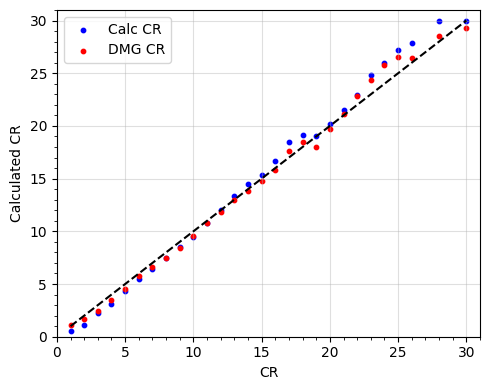

In [151]:
# plot average calculated CR vs target CR
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

df1 = df0.groupby('CR').mean()

plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlim=[0, 31], ylim=[0, 31])

ax.scatter(df1.index, df1['eCR'], s=10, color='b', label='Calc CR')
ax.scatter(df1.index, df1['CR DMG'], s=10, color='r', label='DMG CR')
ax.plot(df1.index, df1.index, '--', color='k')

ax.set_xlabel('CR')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.set_ylabel('Calculated CR')
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))

ax.legend()
ax.grid(which='major', axis='both', alpha=0.4)

plt.savefig('calculated-cr-vs-cr.png')

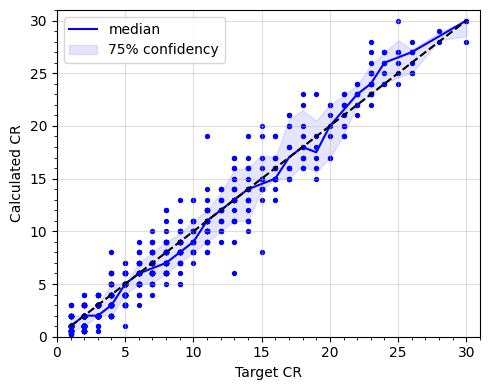

In [150]:
# plot average calculated CR vs target CR
#
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlim=[0, 31], ylim=[0, 31])

ci = 0.75

df1 = df0[['CR','CR DMG']]

# plot points data
ax.scatter(df0['CR'], df0['CR DMG'], s=8, color='b')

# plot median
dfM = df1.groupby('CR').quantile(q=0.5, interpolation='linear')
ax.plot(dfM.index, dfM['CR DMG'], color='b', label='median')

# plot confidency interfal
dfU = df1.groupby('CR').quantile(q=0.5+ci/2, interpolation='linear')
dfD = df1.groupby('CR').quantile(q=0.5-ci/2, interpolation='linear')
ax.fill_between(dfM.index, dfD['CR DMG'], dfU['CR DMG'], color='b', alpha=.1, label='75% confidency')

# plot 1-to-1 line
ax.plot(dfM.index, dfM.index, '--', color='k')

# add labels
ax.set_xlabel('Target CR')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.set_ylabel('Calculated CR')
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))

ax.legend()
ax.grid(which='major', axis='both', alpha=0.4)

plt.savefig('calculated-cr-vs-cr-ci75.png')

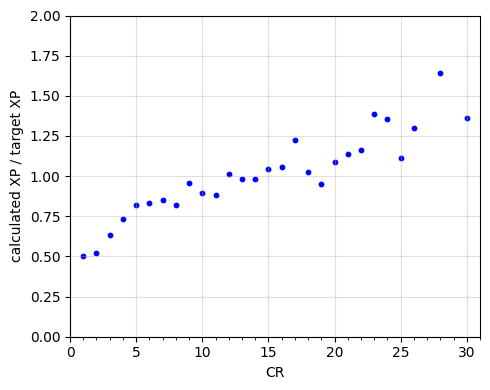

In [147]:
# plot XP ratio vs CR
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

df1 = df0[df0['Book'].isin(ALL_RULES_BOOKS) & df0['Category'].isin(['generic','legendary','unique'])].groupby('CR').median()

plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlim=[0, 31], ylim=[0,2])
ax.scatter(df1.index, df1['eXP']/dfD.loc[df1.index]['eXP Mean'], s=10, color='b')

ax.set_xlabel('CR')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.set_ylabel('calculated XP / target XP')
#ax.yaxis.set_major_locator(MultipleLocator(5))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
#ax.yaxis.set_minor_locator(MultipleLocator(1))

#ax.legend()
ax.grid(which='major', axis='both', alpha=0.4)

plt.savefig('calculated-xp-ratio-vs-cr.png')

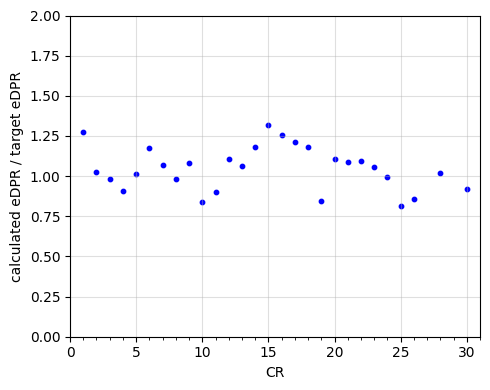

In [145]:
# plot effective DPR ratio vs CR
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

df1 = df0[df0['Book'].isin(ALL_RULES_BOOKS) & df0['Category'].isin(['generic','legendary','unique'])].groupby('CR').median()

plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlim=[0, 31], ylim=[0,2])
ax.scatter(df1.index, df1['eDPR']/dfD.loc[df1.index]['eDPR Mean'], s=10, color='b')

ax.set_xlabel('CR')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.set_ylabel('calculated eDPR / target eDPR')
#ax.yaxis.set_major_locator(MultipleLocator(5))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
#ax.yaxis.set_minor_locator(MultipleLocator(1))

#ax.legend()
ax.grid(which='major', axis='both', alpha=0.4)

plt.savefig('calculated-dpr-ratio-vs-cr.png')

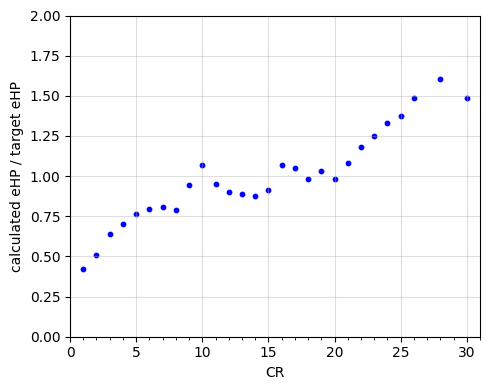

In [144]:
# plot effective HP ratio vs CR
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

df1 = df0[df0['Book'].isin(ALL_RULES_BOOKS) & df0['Category'].isin(['generic','legendary','unique'])].groupby('CR').median()

plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlim=[0, 31], ylim=[0,2])
ax.scatter(df1.index, df1['eHP']/dfD.loc[df1.index]['eHP Mean'], s=10, color='b')

ax.set_xlabel('CR')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.set_ylabel('calculated eHP / target eHP')
#ax.yaxis.set_major_locator(MultipleLocator(5))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
#ax.yaxis.set_minor_locator(MultipleLocator(1))

#ax.legend()
ax.grid(which='major', axis='both', alpha=0.4)

plt.savefig('calculated-hp-ratio-vs-cr.png')

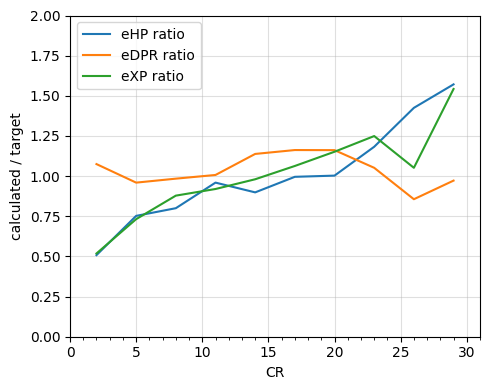

In [170]:
# plot XP ratio vs CR
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)


df1 = df0[df0['Book'].isin(ALL_RULES_BOOKS) & df0['Category'].isin(['generic','legendary','unique'])]
df1['CR'] = 2 + 3*np.floor((df1['CR'] - 1)/3.0)
dfG = df1.groupby('CR').median()


plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlim=[0, 31], ylim=[0,2])
ax.plot(dfG.index, dfG['eHP']/dfD.loc[dfG.index]['eHP Mean'], label='eHP ratio')
ax.plot(dfG.index, dfG['eDPR']/dfD.loc[dfG.index]['eDPR Mean'], label='eDPR ratio')
ax.plot(dfG.index, dfG['eXP']/dfD.loc[dfG.index]['eXP Mean'], label='eXP ratio')

ax.set_xlabel('CR')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.set_ylabel('calculated / target')
#ax.yaxis.set_major_locator(MultipleLocator(5))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
#ax.yaxis.set_minor_locator(MultipleLocator(1))

ax.legend()
ax.grid(which='major', axis='both', alpha=0.4)

##plt.savefig('calculated-ratio-vs-cr.png')

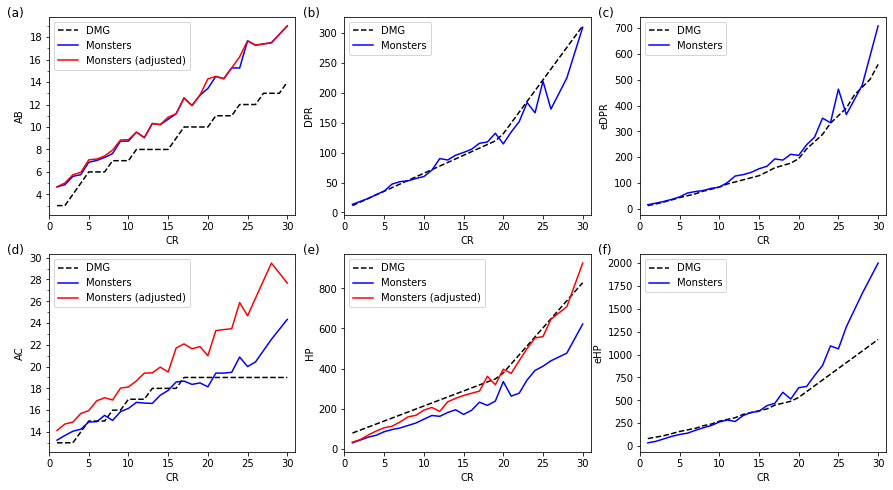

In [63]:
# AB, DPR, AC, HP
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

CR_min =  1
CR_max = 30
dfD0 = dfD

dfG = df0.groupby('CR').mean()

fig = plt.figure(figsize=[15,8])

# attack bonus
ax1 = plt.subplot(231, xlim=[0, 31], xlabel='CR', ylabel='AB')
ax1.plot(dfD0.index, dfD0['AB'], '--', color='k', label='DMG')
ax1.plot(dfG.index, dfG['AB'], '-', color='b', label='Monsters')
ax1.plot(dfG.index, dfG['adj AB'], '-', color='r', label='Monsters (adjusted)')
ax1.text(-0.17, 1.0, '(a)', transform=ax1.transAxes, size=12)
ax1.legend(loc='upper left')
ax1.yaxis.set_major_locator(MultipleLocator(2.0))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax1.yaxis.set_minor_locator(MultipleLocator(1.0))

# damage per round
ax2 = plt.subplot(232, xlim=[0, 31], xlabel='CR', ylabel='DPR')
ax2.plot(dfD0.index, dfD0['DPR Mean'], '--', color='k', label='DMG')
ax2.plot(dfG.index, dfG['DPR'], '-', color='b', label='Monsters')
ax2.text(-0.17, 1.0, '(b)', transform=ax2.transAxes, size=12)
ax2.legend(loc='upper left')

# effective damage per round
ax3 = plt.subplot(233, xlim=[0, 31], xlabel='CR', ylabel='eDPR')
ax3.plot(dfD0.index, dfD0['eDPR Mean'], '--', color='k', label='DMG')
ax3.plot(dfG.index, dfG['eDPR'], '-', color='b', label='Monsters')
ax3.text(-0.17, 1.0, '(c)', transform=ax3.transAxes, size=12)
ax3.legend(loc='upper left')

# armor class
ax4 = plt.subplot(234, xlim=[0, 31], xlabel='CR', ylabel='AC')
ax4.plot(dfD0.index, dfD0['AC'], '--', color='k', label='DMG')
ax4.plot(dfG.index, dfG['AC'], '-', color='b', label='Monsters')
ax4.plot(dfG.index, dfG['adj AC'], '-', color='r', label='Monsters (adjusted)')
ax4.text(-0.17, 1.0, '(d)', transform=ax4.transAxes, size=12)
ax4.legend(loc='upper left')
ax4.yaxis.set_major_locator(MultipleLocator(2.0))
ax4.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax4.yaxis.set_minor_locator(MultipleLocator(1.0))

# hit points
ax5 = plt.subplot(235, xlim=[0, 31], xlabel='CR', ylabel='HP')
ax5.plot(dfD0.index, dfD0['HP Mean'], '--', color='k', label='DMG')
ax5.plot(dfG.index, dfG['HP'], '-', color='b', label='Monsters')
ax5.plot(dfG.index, dfG['adj HP'], '-', color='r', label='Monsters (adjusted)')
ax5.text(-0.17, 1.0, '(e)', transform=ax5.transAxes, size=12)
ax5.legend(loc='upper left')

# effective hit points
ax6 = plt.subplot(236, xlim=[0, 31], xlabel='CR', ylabel='eHP')
ax6.plot(dfD0.index, dfD0['eHP Mean'], '--', color='k', label='DMG')
ax6.plot(dfG.index, dfG['eHP'], '-', color='b', label='Monsters')
ax6.text(-0.17, 1.0, '(f)', transform=ax6.transAxes, size=12)
ax6.legend(loc='upper left')

#fig.savefig('../media/Monster-CR-Stats.pdf')

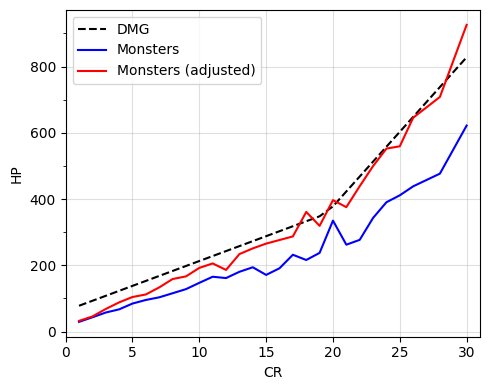

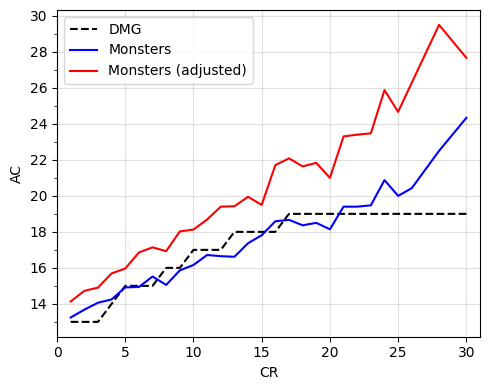

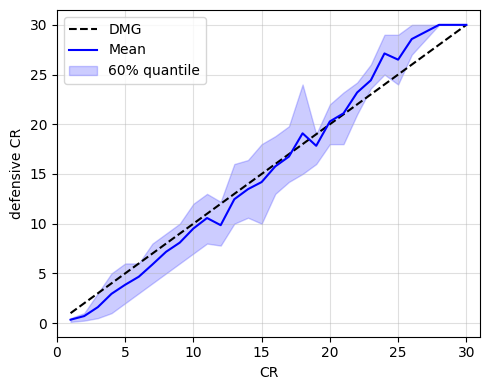

In [376]:
# AC, HP, D-CR
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

dfD0 = dfD
dfG = df0.groupby('CR').mean()
dfU = df0.groupby('CR').quantile(0.8)
dfL = df0.groupby('CR').quantile(0.2)

# hit points
fig = plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlim=[0, 31], xlabel='CR', ylabel='HP')
ax.plot(dfD0.index, dfD0['HP Mean'], '--', color='k', label='DMG')
ax.plot(dfG.index, dfG['HP'], '-', color='b', label='Monsters')
ax.plot(dfG.index, dfG['adj HP'], '-', color='r', label='Monsters (adjusted)')
ax.yaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(100))
ax.legend(loc='upper left')
ax.grid(which='major', axis='both', alpha=0.4)

plt.savefig('hp-vs-cr.svg')

# armor class
fig = plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlim=[0, 31], xlabel='CR', ylabel='AC')
ax.plot(dfD0.index, dfD0['AC'], '--', color='k', label='DMG')
ax.plot(dfG.index, dfG['AC'], '-', color='b', label='Monsters')
ax.plot(dfG.index, dfG['adj AC'], '-', color='r', label='Monsters (adjusted)')
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.legend(loc='upper left')
ax.grid(which='major', axis='both', alpha=0.4)

plt.savefig('ac-vs-cr.svg')

# D-CR
fig = plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlim=[0, 31], xlabel='CR', ylabel='defensive CR')
ax.plot(dfD0.index, dfD0.index, '--', color='k', label='DMG')
ax.plot(dfG.index, dfG['D-CR DMG'], '-', color='b', label='Mean')
ax.fill_between(dfG.index, dfL['D-CR DMG'], dfU['D-CR DMG'], alpha=0.2, color='b', label='60% quantile')
ax.legend(loc='upper left')
ax.grid(which='major', axis='both', alpha=0.4)

plt.savefig('d-cr-vs-cr.svg')

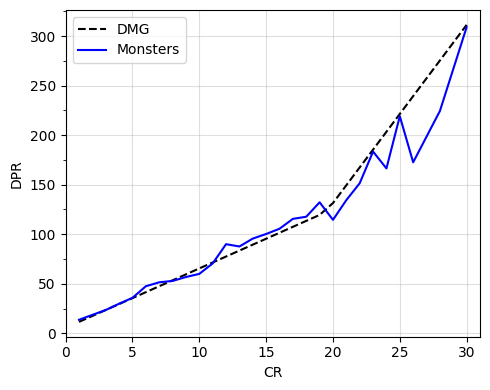

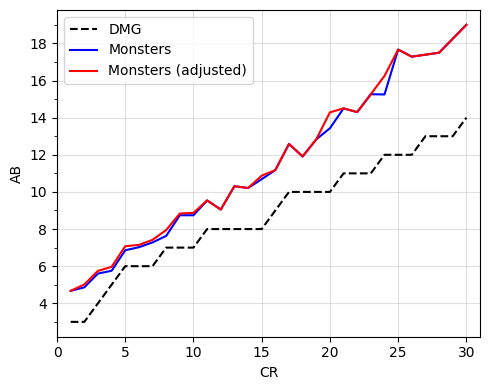

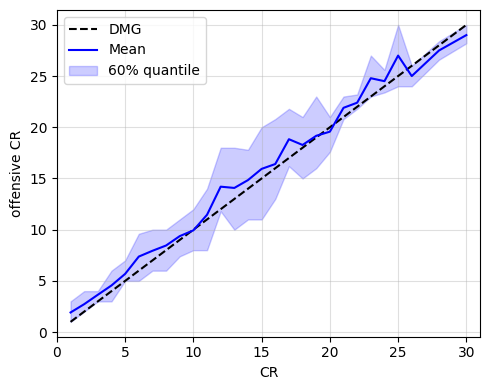

In [375]:
# DPR, AB, O-CR
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

dfD0 = dfD
dfG = df0.groupby('CR').mean()
dfU = df0.groupby('CR').quantile(0.8)
dfL = df0.groupby('CR').quantile(0.2)

# damage per round
fig = plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlim=[0, 31], xlabel='CR', ylabel='DPR')
ax.plot(dfD0.index, dfD0['DPR Mean'], '--', color='k', label='DMG')
ax.plot(dfG.index, dfG['DPR'], '-', color='b', label='Monsters')
#ax.plot(dfG.index, dfG['adj HP'], '-', color='r', label='Monsters (adjusted)')
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(25))
ax.legend(loc='upper left')
ax.grid(which='major', axis='both', alpha=0.4)

plt.savefig('dpr-vs-cr.svg')

# attack bonus
fig = plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlim=[0, 31], xlabel='CR', ylabel='AB')
ax.plot(dfD0.index, dfD0['AB'], '--', color='k', label='DMG')
ax.plot(dfG.index, dfG['AB'], '-', color='b', label='Monsters')
ax.plot(dfG.index, dfG['adj AB'], '-', color='r', label='Monsters (adjusted)')
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.legend(loc='upper left')
ax.grid(which='major', axis='both', alpha=0.4)

plt.savefig('ab-vs-cr.svg')

# D-CR
fig = plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlim=[0, 31], xlabel='CR', ylabel='offensive CR')
ax.plot(dfD0.index, dfD0.index, '--', color='k', label='DMG')
ax.plot(dfG.index, dfG['O-CR DMG'], '-', color='b', label='Mean')
ax.fill_between(dfG.index, dfL['O-CR DMG'], dfU['O-CR DMG'], alpha=0.2, color='b', label='60% quantile')
ax.legend(loc='upper left')
ax.grid(which='major', axis='both', alpha=0.4)

plt.savefig('o-cr-vs-cr.svg')

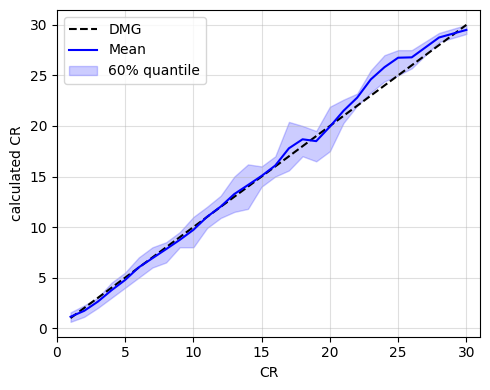

In [374]:
# DMG CR
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

dfD0 = dfD
dfG = df0.groupby('CR').mean()
dfU = df0.groupby('CR').quantile(0.8)
dfL = df0.groupby('CR').quantile(0.2)

# CR
col = 'C-CR DMG'
ylab = 'calculated CR'
fig = plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlim=[0, 31], xlabel='CR', ylabel=ylab)
ax.plot(dfD0.index, dfD0.index, '--', color='k', label='DMG')
ax.plot(dfG.index, dfG[col], '-', color='b', label='Mean')
ax.fill_between(dfG.index, dfL[col], dfU[col], alpha=0.2, color='b', label='60% quantile')
ax.legend(loc='upper left')
ax.grid(which='major', axis='both', alpha=0.4)

plt.savefig('dmg-cr-vs-cr.svg')

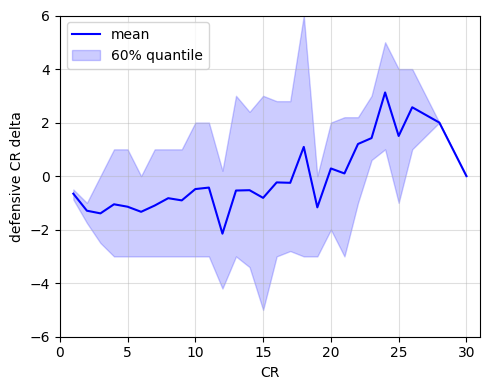

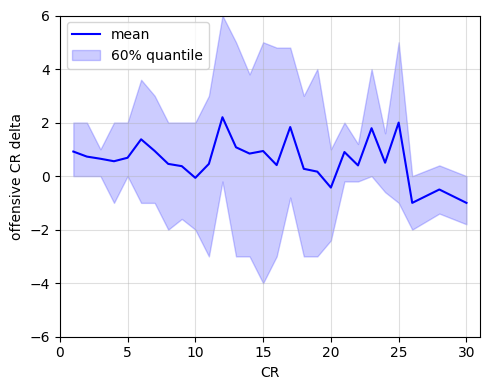

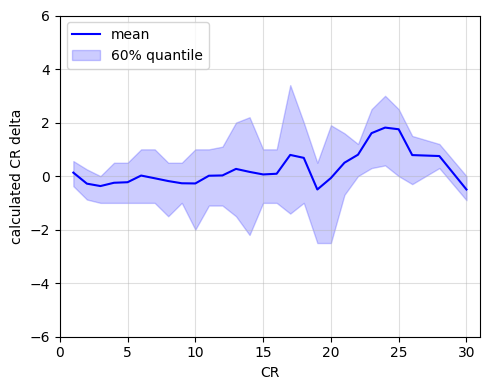

In [368]:
# DMG CR deltas
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

dfD0 = dfD
df1 = df0[df0['CR'].between(1,30) & df0['Category'].isin(['generic','legendary','unique'])]
dfG = df1.groupby('CR').mean()
dfU = df1.groupby('CR').quantile(0.8)
dfL = df1.groupby('CR').quantile(0.2)

# D-CR
col = 'D-CR DMG'
ylab = 'defensive CR delta'
fig = plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlim=[0, 31], ylim=[-6,6], xlabel='CR', ylabel=ylab)
ax.plot(dfG.index, dfG[col] - dfG.index, '-', color='b', label='mean')
ax.fill_between(dfG.index, dfL[col] - dfG.index, dfU[col] - dfG.index, alpha=0.2, color='b', label='60% quantile')
ax.legend(loc='upper left')
ax.grid(which='major', axis='both', alpha=0.4)

#plt.savefig('dmg-d-cr-delta-vs-cr.png')

# O-CR
col = 'O-CR DMG'
ylab = 'offensive CR delta'
fig = plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlim=[0, 31], ylim=[-6,6], xlabel='CR', ylabel=ylab)
ax.plot(dfG.index, dfG[col] - dfG.index, '-', color='b', label='mean')
ax.fill_between(dfG.index, dfL[col] - dfG.index, dfU[col] - dfG.index, alpha=0.2, color='b', label='60% quantile')
ax.legend(loc='upper left')
ax.grid(which='major', axis='both', alpha=0.4)

#plt.savefig('dmg-o-cr-delta-vs-cr.png')

# CR
col = 'C-CR DMG'
ylab = 'calculated CR delta'
fig = plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlim=[0, 31], ylim=[-6,6], xlabel='CR', ylabel=ylab)
ax.plot(dfG.index, dfG[col] - dfG.index, '-', color='b', label='mean')
ax.fill_between(dfG.index, dfL[col] - dfG.index, dfU[col] - dfG.index, alpha=0.2, color='b', label='60% quantile')
ax.legend(loc='upper left')
ax.grid(which='major', axis='both', alpha=0.4)

#plt.savefig('dmg-cr-delta-vs-cr.png')

Type
aberration     1.371571
beast          0.930394
celestial      1.666667
construct      1.212546
dragon         1.564297
elemental      1.657577
fey            1.159576
fiend          1.612572
giant          0.787859
humanoid       1.233837
monstrosity    1.270749
ooze           0.731925
plant          0.868028
undead         1.425866
Name: CR Delta DMG, dtype: float64

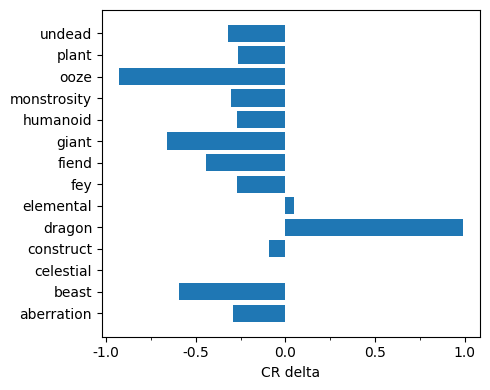

In [339]:
# DMG CR deltas
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

column = 'Type'

df1 = df0[df0['CR'].between(1,30)]
dfG = df1.groupby(column).mean()

x = dfG.index.tolist()
x_pos = [i for i, _ in enumerate(x)]
y = dfG['CR Delta DMG'].to_list()



ax.barh(x_pos, y)

plt.yticks(x_pos, x)

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))

#ax.grid(which='major', axis='both', alpha=0.4)

df1.groupby(column).std()['CR Delta DMG']




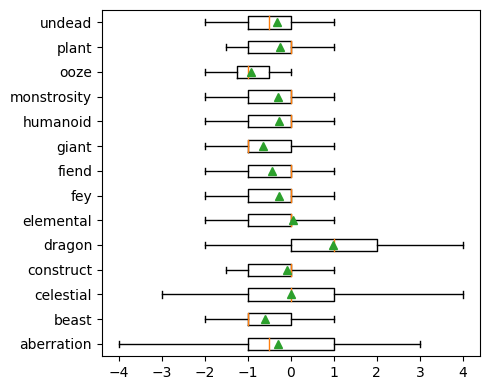

In [365]:
df1 = df0[df0['CR'].between(1,30)]

col = 'Type'
groups = df1[col].sort_values().unique()

fig = plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes()
bp = ax.boxplot(tuple(df1[df1[col].isin([g])]['CR Delta DMG'] for g in groups), 
    labels=groups, showmeans=True, vert=False, showfliers=False, patch_artist=False)


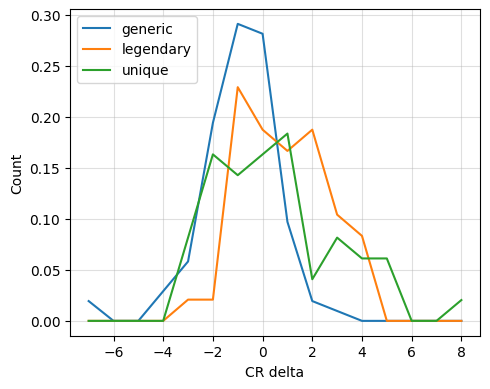

In [295]:
# DMG CR deltas
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

df1 = df0[df0['CR'].between(10,20)]

rMin = df1['CR Delta DMG'].min()
rMax = df1['CR Delta DMG'].max()
rDel = 1.0
nBins = int(np.round(1 + (rMax - rMin)/rDel))
rRange = np.linspace(rMin - rDel/2, rMax + rDel/2, int(round((rMax - rMin)/rDel)) + 2)
x = np.linspace(rMin, rMax, nBins)

fig = plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlabel='CR delta', ylabel='Count')
y, t = np.histogram(df1[df1['Category'].isin(['generic'])]['CR Delta DMG'], rRange, density=True); ax.plot(x, y, label='generic')
y, t = np.histogram(df1[df1['Category'].isin(['legendary'])]['CR Delta DMG'], rRange, density=True); ax.plot(x, y, label='legendary')
y, t = np.histogram(df1[df1['Category'].isin(['unique'])]['CR Delta DMG'], rRange, density=True); ax.plot(x, y, label='unique')
ax.legend(loc='upper left')
ax.grid(which='major', axis='both', alpha=0.4)

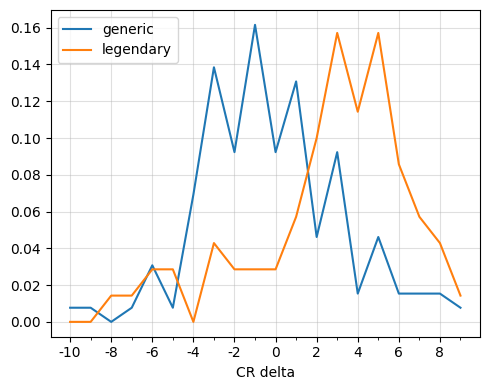

In [373]:
# DMG CR deltas
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

df1 = df0[df0['CR'].between(10,20)]

column = 'O-CR Delta DMG'
rMin = df1[column].min()
rMax = df1[column].max()
rDel = 1.0
nBins = int(np.round(1 + (rMax - rMin)/rDel))
rRange = np.linspace(rMin - rDel/2, rMax + rDel/2, int(round((rMax - rMin)/rDel)) + 2)
x = np.linspace(rMin, rMax, nBins)

fig = plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlabel='CR delta')
y, t = np.histogram(df1[df1['Legendary'].isin(['N'])][column], rRange, density=True); ax.plot(x, y, label='generic')
y, t = np.histogram(df1[df1['Legendary'].isin(['L','LL'])][column], rRange, density=True); ax.plot(x, y, label='legendary')
ax.legend(loc='upper left')
ax.grid(which='major', axis='both', alpha=0.4)

ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

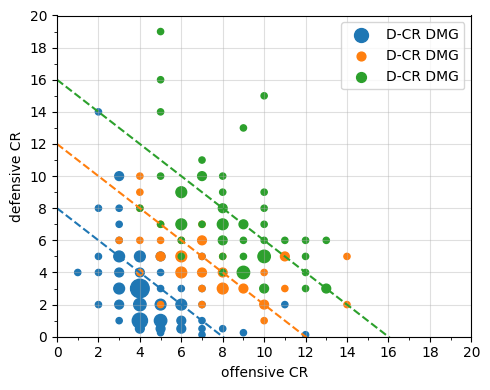

In [237]:
# DPR vs HP
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

CRs = [4,6,8]
#colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors = colors[0:3]

fig = plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlim=[0,20], ylim=[0,20], xlabel='offensive CR', ylabel='defensive CR')

for CR, c in zip(CRs, colors):
    df1 = df0[df0['CR'].isin([CR]) & df0['Category'].isin(['generic','legendary','unique'])]
    dft = df1.groupby(['D-CR DMG', 'O-CR DMG']).size().to_frame('Count').reset_index()
    dft['Count'] = dft['Count']*20
    #ax.scatter(df1['O-CR DMG'], df1['D-CR DMG'], label='CR='+str(CR), color=c)
    ax.scatter('O-CR DMG', 'D-CR DMG', s='Count', alpha=1.0, data=dft)

ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))

ax.legend()
ax.grid(which='major', axis='both', alpha=0.4)

x = np.linspace(0, 30, 31)
XP = dfD['XP'].values
for CR, c in zip(CRs, colors):
    ax.plot(x, 2*CR - x, '--', color=c)

In [230]:
df1 = df0[df0['CR'].isin([10]) & df0['Category'].isin(['generic','legendary','unique'])]
tmp = df1.groupby(['D-CR DMG', 'O-CR DMG']).size().to_frame('Count').reset_index()
tmp['Count'].max()

2

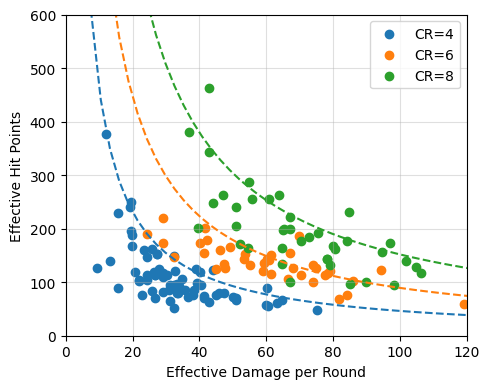

In [156]:
# DPR vs HP
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

CRs = [4,6,8]
#colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors = colors[0:3]

fig = plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlim=[0,120], ylim=[0,600])

ax.set_xlabel('Effective Damage per Round')
#ax.xaxis.set_major_locator(MultipleLocator(5))
#ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
#ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.set_ylabel('Effective Hit Points')
#ax.yaxis.set_major_locator(MultipleLocator(1.0))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax.yaxis.set_minor_locator(MultipleLocator(0.5))

for CR, c in zip(CRs, colors):
    df1 = df0[df0['CR'].isin([CR]) & df0['Category'].isin(['generic','legendary'])]
    ax.scatter(df1['eDPR'], df1['eHP'], label='CR='+str(CR), color=c)

ax.legend()
ax.grid(which='major', axis='both', alpha=0.4)

x = np.linspace(5, 140, 50)
XP = dfD['XP'].values
for CR, c in zip(CRs, colors):
    ax.plot(x, 4*dfD.loc[CR]['eXP Mean']/x, '--', color=c)

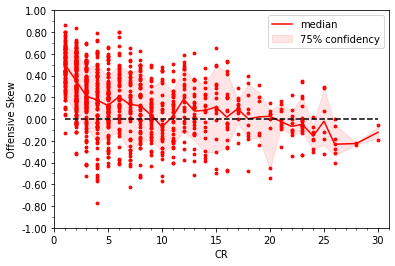

In [12]:
# plot calculated offensive skew vs target CR
#
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

plt.figure()
ax = plt.axes(xlim=[0, 31], ylim=[-1, 1])

ci = 0.75

df0 = df[df['CR'].between(1, 30) & df['Legendary'].isin(['N','L','LL'])]
df1 = df0[['CR','eXP Skew']]

# plot points data
ax.scatter(df0['CR'], df0['eXP Skew'], s=8, color='r')

# plot mean
#dfM = df1.groupby('CR').mean()
#x  = dfM.index.to_series()
#yM = dfM['eXP Skew']
#ax.plot(x, yM, '-', color='r', label='mean')

# plot median
dfM = df1.groupby('CR').quantile(q=0.5, interpolation='linear')
x  = dfM.index.to_series()
yM = dfM['eXP Skew']
ax.plot(x, yM, '-', color='r', label='median')

# plot confidency interfal
dfU = df1.groupby('CR').quantile(q=0.5+ci/2, interpolation='linear')
yU = dfU['eXP Skew']
dfD = df1.groupby('CR').quantile(q=0.5-ci/2, interpolation='linear')
yD = dfD['eXP Skew']
ax.fill_between(x, yD, yU, color='r', alpha=.1, label='75% confidency')

# plot 1-to-1 line
ax.plot(x, x*0.0, '--', color='k')

# add labels
ax.set_xlabel('CR')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.set_ylabel('Offensive Skew')
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax.legend()

#plt.savefig('../media/offensive-skew-vs-CR.pdf')